In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 22:01:40] [setup] RAM Tracking...
[codecarbon INFO @ 22:01:40] [setup] CPU Tracking...
[codecarbon WARNING @ 22:01:42] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 22:01:44] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 22:01:44] [setup] GPU Tracking...
[codecarbon INFO @ 22:01:44] No GPU found.
[codecarbon INFO @ 22:01:44] >>> Tracker's metadata:
[codecarbon INFO @ 22:01:44]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 22:01:44]   Python version: 3.9.12
[codecarbon INFO @ 22:01:44]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 22:01:44]   Available RAM : 8.000 GB
[codecarbon INFO @ 22:01:44]   CPU count: 8
[codecarbon INFO @ 22:01:44]   CPU model: Apple M1
[codecarbon INFO @ 22:01:44]   GPU count: None
[codecarbon INFO @ 22:01:44]   GPU model: None
[codecarbon INFO @ 22:01:47] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/trisha2094/weatheraus/versions/1/weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.shape

(142193, 24)

In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [9]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [11]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [12]:
df['Date'].dtypes

dtype('O')

In [13]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [15]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [16]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [17]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [18]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [19]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [20]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [21]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [22]:
X_train.shape, X_test.shape


((95269, 24), (46924, 24))

In [23]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [24]:
X_train.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
119504,Perth,13.4,20.2,5.2,1.4,5.9,WNW,50.0,NW,WNW,...,1008.5,1006.7,4.0,6.0,18.8,18.7,Yes,2013,8,30
82592,Brisbane,21.8,27.7,0.2,3.2,0.2,SSE,41.0,SE,ESE,...,1016.9,1015.3,7.0,8.0,26.8,25.2,No,2010,12,24
29509,Sydney,18.4,22.8,14.4,7.0,3.3,NaN,NaN,S,S,...,1009.2,1011.7,8.0,7.0,20.9,21.0,Yes,2008,2,13
31844,Sydney,19.7,27.9,0.0,8.0,7.7,NW,61.0,WSW,ESE,...,1007.8,1008.3,7.0,1.0,24.1,25.2,No,2014,10,7
58355,Bendigo,2.7,18.4,0.2,3.1,NaN,NW,20.0,SE,NNE,...,1027.8,1024.2,NaN,1.0,12.0,17.8,No,2013,9,8


In [25]:
import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
119504,1,13.4,20.2,5.2,1.4,5.9,1,50.0,1,1,...,1008.5,1006.7,4.0,6.0,18.8,18.7,1,2013,8,30
82592,2,21.8,27.7,0.2,3.2,0.2,2,41.0,2,2,...,1016.9,1015.3,7.0,8.0,26.8,25.2,2,2010,12,24
29509,3,18.4,22.8,14.4,7.0,3.3,17,NaN,3,3,...,1009.2,1011.7,8.0,7.0,20.9,21.0,1,2008,2,13
31844,3,19.7,27.9,0.0,8.0,7.7,3,61.0,4,2,...,1007.8,1008.3,7.0,1.0,24.1,25.2,2,2014,10,7
58355,4,2.7,18.4,0.2,3.1,NaN,3,20.0,2,4,...,1027.8,1024.2,NaN,1.0,12.0,17.8,2,2013,9,8


In [26]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
56320,11,7.1,13.0,8.8,NaN,NaN,6,41.0,11,1,...,1001.7,1005.4,8.0,8.0,8.6,11.5,1,2016,6,9
124136,5,13.2,18.3,0.0,NaN,NaN,8,48.0,13,2,...,1027.6,1023.8,NaN,NaN,14.2,17.0,2,2009,10,24
117063,34,9.2,22.7,0.0,5.0,11.1,4,52.0,5,2,...,1030.1,1025.9,0.0,0.0,15.1,22.5,2,2015,9,21
6974,42,15.3,26.1,0.0,10.4,NaN,8,44.0,15,11,...,1013.2,1009.8,7.0,7.0,17.5,24.3,2,2011,12,6
61546,24,11.9,31.8,0.0,5.0,4.1,3,72.0,15,7,...,1006.7,1001.0,7.0,6.0,16.2,27.4,2,2014,3,15


In [27]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [28]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [29]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [30]:
cols = X_train.columns

In [31]:
from sklearn.preprocessing import StandardScaler

# Crear un StandardScaler
scaler = StandardScaler()

# Identificar columnas numéricas
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Normalizar solo las columnas numéricas de X_train y X_test
X_train_scaled = X_train.copy()  # Copia del dataset original
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Mostrar resultados
print("X_train con variables numéricas normalizadas:")
print(X_train_scaled.head())

print("X_test con variables numéricas normalizadas:")
print(X_test_scaled.head())

X_train con variables numéricas normalizadas:
        Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
119504 -1.670784  0.191074 -0.424700  0.337016    -0.954999 -0.450928   
82592  -1.598585  1.503875  0.629918 -0.253711    -0.532585 -1.956889   
29509  -1.526386  0.972503 -0.059099  1.423955     0.359177 -1.137858   
31844  -1.526386  1.175675  0.658041 -0.277341     0.593851  0.024639   
58355  -1.454186 -1.481186 -0.677809 -0.253711    -0.556052       NaN   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
119504    -1.639709       0.739939   -1.644956   -1.653048  ...    -1.288288   
82592     -1.433620       0.077004   -1.444170   -1.439308  ...    -0.106059   
29509      1.657702            NaN   -1.243383   -1.225567  ...    -1.189769   
31844     -1.227532       1.550193   -1.042597   -1.439308  ...    -1.386807   
58355     -1.227532      -1.469844   -1.444170   -1.011827  ...     1.428023   

        Pressure3pm  Cloud9am  Clo

In [32]:
X_train = X_train_scaled
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
119504,-1.670784,0.191074,-0.424700,0.337016,-0.954999,-0.450928,-1.639709,0.739939,-1.644956,-1.653048,...,-1.288288,-1.217982,-0.152038,0.548557,0.280545,-0.429879,-1.820527,0.095513,0.466399,1.623685
82592,-1.598585,1.503875,0.629918,-0.253711,-0.532585,-1.956889,-1.433620,0.077004,-1.444170,-1.439308,...,-0.106059,0.005494,0.886424,1.283215,1.513643,0.507859,0.488955,-1.085307,1.634253,0.941800
29509,-1.526386,0.972503,-0.059099,1.423955,0.359177,-1.137858,1.657702,NaN,-1.243383,-1.225567,...,-1.189769,-0.506659,1.232579,0.915886,0.604233,-0.098064,-1.820527,-1.872520,-1.285382,-0.308324
31844,-1.526386,1.175675,0.658041,-0.277341,0.593851,0.024639,-1.227532,1.550193,-1.042597,-1.439308,...,-1.386807,-0.990359,0.886424,-1.288087,1.097472,0.507859,0.488955,0.489119,1.050326,-0.990209
58355,-1.454186,-1.481186,-0.677809,-0.253711,-0.556052,NaN,-1.227532,-1.469844,-1.444170,-1.011827,...,1.428023,1.271650,NaN,-1.288087,-0.767587,-0.559720,0.488955,0.095513,0.758362,-0.876562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.061993,-0.496585,-0.607501,1.211293,NaN,NaN,0.008997,0.224323,0.563693,0.270614,...,-0.021615,0.346929,NaN,NaN,-0.181866,-0.588573,-1.820527,-0.298094,0.758362,-1.672095
119879,-1.670784,0.144188,-0.466885,0.077096,-1.001933,-1.402061,-0.815356,-0.070314,1.366839,0.270614,...,0.062830,0.418062,0.886424,0.915886,-0.243521,-0.372172,-1.820527,0.489119,0.758362,-0.762914
103694,-0.154604,-0.215270,0.320563,-0.277341,1.532548,1.424920,0.627261,0.297983,-0.641024,0.698095,...,-0.274949,-0.378621,-1.536655,-1.655416,-0.258935,0.204897,0.488955,-1.085307,1.634253,0.487209
131932,0.278590,-0.137127,-0.255961,-0.277341,NaN,NaN,0.421173,-0.070314,0.965266,0.911835,...,NaN,NaN,1.232579,-0.186101,-0.181866,-0.862681,0.488955,0.489119,1.342289,-1.217505


In [33]:
X_test = X_test_scaled
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
56320,-0.948793,-0.793528,-1.437134,0.762340,NaN,NaN,-0.609268,0.077004,0.362907,-1.653048,...,-2.245330,-1.402927,1.232579,1.283215,-1.291654,-1.468604,-1.820527,1.276332,-0.117528,-0.762914
124136,-1.381987,0.159816,-0.691870,-0.277341,NaN,NaN,-0.197091,0.592620,0.764480,-1.439308,...,1.399874,1.214744,NaN,NaN,-0.428486,-0.675134,0.488955,-1.478913,1.050326,0.941800
117063,0.711784,-0.465327,-0.073161,-0.277341,-0.110171,0.922932,-1.021444,0.887258,-0.841811,-1.439308,...,1.751728,1.513500,-1.536655,-1.655416,-0.289762,0.118337,0.488955,0.882726,0.758362,0.600857
6974,1.289377,0.488017,0.404933,-0.277341,1.157070,NaN,-0.197091,0.297983,1.166052,0.484354,...,-0.626803,-0.776962,0.886424,0.915886,0.080167,0.378018,0.488955,-0.691700,1.634253,-1.103857
61546,-0.010206,-0.043355,1.206443,-0.277341,-0.110171,-0.926495,-1.227532,2.360447,1.166052,-0.370607,...,-1.541622,-2.028891,0.886424,0.548557,-0.120211,0.825247,0.488955,0.489119,-0.993419,-0.081029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,-0.443400,1.738304,0.868965,-0.135566,-0.157106,-1.719106,-0.197091,0.224323,-1.444170,-0.798087,...,-0.654951,-0.748509,0.886424,0.915886,1.359505,1.041648,-1.820527,-1.085307,-0.701455,-1.331152
42901,-0.659997,-0.215270,-0.902794,-0.277341,NaN,NaN,-0.815356,0.592620,1.366839,1.125575,...,-1.119398,-0.905000,1.232579,1.283215,-0.536382,-0.790548,0.488955,0.095513,-0.117528,0.146267
19132,0.567386,0.191074,-0.227838,-0.277341,NaN,NaN,0.833350,-1.322525,0.162121,-0.798087,...,0.161349,0.119306,NaN,NaN,0.033926,-0.199051,0.488955,0.095513,-0.701455,0.941800
101033,-0.587798,0.769331,0.742411,-0.277341,0.687721,-0.715131,0.008997,-0.070314,0.162121,0.270614,...,-1.429029,-1.374474,0.886424,0.915886,0.696716,-0.112491,0.488955,-0.691700,1.634253,1.055447


In [34]:
# Verificar valores NaN antes del relleno
print("Valores NaN en X_train antes de rellenar:")
print(X_train.isna().sum())

print("\nValores NaN en X_test antes de rellenar:")
print(X_test.isna().sum())

# Calcular la mediana de X_train
median_values = X_train.median()

# Rellenar NaN en ambos conjuntos con la mediana de X_train
X_train.fillna(median_values, inplace=True)
X_test.fillna(median_values, inplace=True)

# Verificar valores NaN después del relleno
print("\nValores NaN en X_train después de rellenar:")
print(X_train.isna().sum())

print("\nValores NaN en X_test después de rellenar:")
print(X_test.isna().sum())


Valores NaN en X_train antes de rellenar:
Location             0
MinTemp            433
MaxTemp            226
Rainfall           981
Evaporation      40817
Sunshine         45471
WindGustDir          0
WindGustSpeed     6150
WindDir9am           0
WindDir3pm           0
WindSpeed9am       885
WindSpeed3pm      1743
Humidity9am       1173
Humidity3pm       2419
Pressure9am       9380
Pressure3pm       9364
Cloud9am         36087
Cloud3pm         38350
Temp9am            596
Temp3pm           1831
RainToday            0
Year                 0
Month                0
Day                  0
dtype: int64

Valores NaN en X_test antes de rellenar:
Location             0
MinTemp            204
MaxTemp             96
Rainfall           425
Evaporation      20026
Sunshine         22345
WindGustDir          0
WindGustSpeed     3120
WindDir9am           0
WindDir3pm           0
WindSpeed9am       463
WindSpeed3pm       887
Humidity9am        601
Humidity3pm       1191
Pressure9am       4634
Pressu

MODELO

In [35]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10, random_state=42)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8419


In [36]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

[codecarbon INFO @ 22:02:02] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:02:02] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:02:02] 0.000033 kWh of electricity used since the beginning.


Model accuracy score with 100 decision-trees : 0.8536


In [37]:
# instantiate the classifier with n_estimators = 200

rfc_200 = RandomForestClassifier(n_estimators=200, random_state=42)



# fit the model to the training set

rfc_200.fit(X_train, y_train)



# Predict on the test set results

y_pred_200 = rfc_200.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

[codecarbon INFO @ 22:02:17] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:02:17] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:02:17] 0.000067 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:02:32] Energy consumed for RAM : 0.000038 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:02:32] Energy consumed for all CPUs : 0.000063 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:02:32] 0.000100 kWh of electricity used since the beginning.


Model accuracy score with 200 decision-trees : 0.8545


In [38]:
# instantiate the classifier with n_estimators = 500

rfc_500 = RandomForestClassifier(n_estimators=500, random_state=42)



# fit the model to the training set

rfc_500.fit(X_train, y_train)



# Predict on the test set results

y_pred_500 = rfc_500.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 500 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_500)))

[codecarbon INFO @ 22:02:47] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:02:47] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:02:47] 0.000133 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:03:02] Energy consumed for RAM : 0.000063 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:03:02] Energy consumed for all CPUs : 0.000104 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:03:02] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:03:17] Energy consumed for RAM : 0.000075 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:03:17] Energy consumed for all CPUs : 0.000125 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:03:17] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:03:32] Energy consumed for RAM : 0.000088 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:03:32] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 5.0 W
[codecarbon

Model accuracy score with 500 decision-trees : 0.8559


n_estimators = 500

In [39]:
# create the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=42)

# fit the model to the training set

clf.fit(X_train, y_train)

[codecarbon INFO @ 22:04:02] Energy consumed for RAM : 0.000113 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:04:02] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:04:02] 0.000300 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:04:17] Energy consumed for RAM : 0.000125 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:04:17] Energy consumed for all CPUs : 0.000208 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:04:17] 0.000333 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:04:32] Energy consumed for RAM : 0.000138 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:04:32] Energy consumed for all CPUs : 0.000229 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:04:32] 0.000367 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:04:47] Energy consumed for RAM : 0.000150 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:04:47] Energy consumed for all CPUs : 0.000250 kWh. Total CPU Power : 5.0 W
[codecarbon

RandomForestClassifier(n_estimators=500, random_state=42)

In [40]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Humidity3pm      0.164482
Pressure3pm      0.057731
Sunshine         0.053200
Rainfall         0.050961
WindGustSpeed    0.050892
Humidity9am      0.050201
Pressure9am      0.049706
Temp3pm          0.043906
MinTemp          0.042790
MaxTemp          0.040962
Temp9am          0.039765
Cloud3pm         0.035722
Day              0.032195
RainToday        0.030936
WindSpeed3pm     0.030540
Location         0.029584
WindSpeed9am     0.028034
WindGustDir      0.026750
WindDir3pm       0.025851
WindDir9am       0.025288
Evaporation      0.023354
Month            0.023184
Year             0.022998
Cloud9am         0.020971
dtype: float64

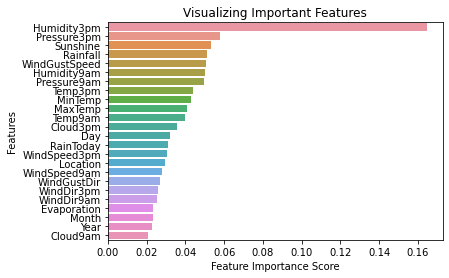

In [41]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [42]:
# declare feature vector and target variable

X_test = X_test.drop(['Cloud9am', 'Year', 'Month'], axis=1)
X_train = X_train.drop(['Cloud9am', 'Year', 'Month'], axis=1)

In [43]:
# instantiate the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 22:05:17] Energy consumed for RAM : 0.000175 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:05:17] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:05:17] 0.000467 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:05:32] Energy consumed for RAM : 0.000188 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:05:32] Energy consumed for all CPUs : 0.000313 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:05:32] 0.000500 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:05:47] Energy consumed for RAM : 0.000200 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:05:47] Energy consumed for all CPUs : 0.000333 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:05:47] 0.000533 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:05:47] 0.000456 g.CO2eq/s mean an estimation of 14.383299534413263 kg.CO2eq/year
[codecarbon INFO @ 22:06:02] Energy consumed for RAM : 0.000213 kWh. RAM Power : 3.0 W
[codec

Model accuracy score with variable removed : 0.8548


In [44]:
# declare feature vector and target variable

X_test = X_test.drop(['Evaporation'], axis=1)
X_train = X_train.drop(['Evaporation'], axis=1)

In [45]:
# instantiate the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 22:06:32] Energy consumed for RAM : 0.000238 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:06:32] Energy consumed for all CPUs : 0.000396 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:06:32] 0.000633 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:06:47] Energy consumed for RAM : 0.000250 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:06:47] Energy consumed for all CPUs : 0.000417 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:06:47] 0.000667 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:07:02] Energy consumed for RAM : 0.000263 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:07:02] Energy consumed for all CPUs : 0.000438 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:07:02] 0.000700 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:07:17] Energy consumed for RAM : 0.000275 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:07:17] Energy consumed for all CPUs : 0.000458 kWh. Total CPU Power : 5.0 W
[codecarbon

Model accuracy score with variable removed : 0.8545


In [46]:
# declare feature vector and target variable

X_test = X_test.drop(['WindDir9am'], axis=1)
X_train = X_train.drop(['WindDir9am'], axis=1)

In [47]:
# instantiate the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 22:08:02] Energy consumed for RAM : 0.000313 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:08:02] Energy consumed for all CPUs : 0.000521 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:08:02] 0.000834 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:08:17] Energy consumed for RAM : 0.000325 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:08:17] Energy consumed for all CPUs : 0.000542 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:08:17] 0.000867 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:08:32] Energy consumed for RAM : 0.000338 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:08:32] Energy consumed for all CPUs : 0.000563 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:08:32] 0.000900 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:08:47] Energy consumed for RAM : 0.000350 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:08:47] Energy consumed for all CPUs : 0.000584 kWh. Total CPU Power : 5.0 W
[codecarbon

Model accuracy score with variable removed : 0.8547


In [48]:
# declare feature vector and target variable

X_test = X_test.drop(['WindDir3pm'], axis=1)
X_train = X_train.drop(['WindDir3pm'], axis=1)

In [49]:
# instantiate the classifier with n_estimators = 500

clf = RandomForestClassifier(n_estimators=500, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[codecarbon INFO @ 22:09:17] Energy consumed for RAM : 0.000375 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:17] Energy consumed for all CPUs : 0.000625 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:17] 0.001000 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:32] Energy consumed for RAM : 0.000388 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:32] Energy consumed for all CPUs : 0.000646 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:32] 0.001034 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:47] Energy consumed for RAM : 0.000400 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:09:47] Energy consumed for all CPUs : 0.000667 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:09:47] 0.001067 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:09:47] 0.000456 g.CO2eq/s mean an estimation of 14.38334924797178 kg.CO2eq/year
[codecarbon INFO @ 22:10:02] Energy consumed for RAM : 0.000413 kWh. RAM Power : 3.0 W
[codeca

Model accuracy score with variable removed : 0.8547


In [50]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

[codecarbon INFO @ 22:10:32] Energy consumed for RAM : 0.000438 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:10:32] Energy consumed for all CPUs : 0.000730 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:10:32] 0.001167 kWh of electricity used since the beginning.


Confusion matrix

 [[34725  1741]
 [ 5077  5381]]


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     36466
         Yes       0.76      0.51      0.61     10458

    accuracy                           0.85     46924
   macro avg       0.81      0.73      0.76     46924
weighted avg       0.85      0.85      0.84     46924



In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8547


In [54]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8724


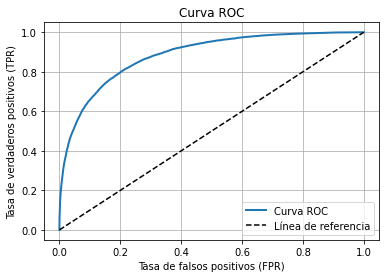

In [55]:
# plot ROC Curve

from sklearn.metrics import roc_curve

# Obtener las probabilidades en lugar de las predicciones directas
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilidad de la clase "Yes"

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label="Yes")

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, label="Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Línea de referencia")  # Línea diagonal (azar)
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de la clase positiva ("Yes")
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Asegúrate de usar el modelo correcto

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)

print(f"AUC del modelo: {auc:.4f}")


AUC del modelo: 0.8836


In [57]:



# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 22:10:41] Energy consumed for RAM : 0.000445 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 22:10:41] Energy consumed for all CPUs : 0.000742 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 22:10:41] 0.001188 kWh of electricity used since the beginning.


0.00024378058116986595